In [1]:
import osmnx as ox
import networkx as nx
import matplotlib

In [2]:
%matplotlib inline
ox.__version__

'1.1.2'

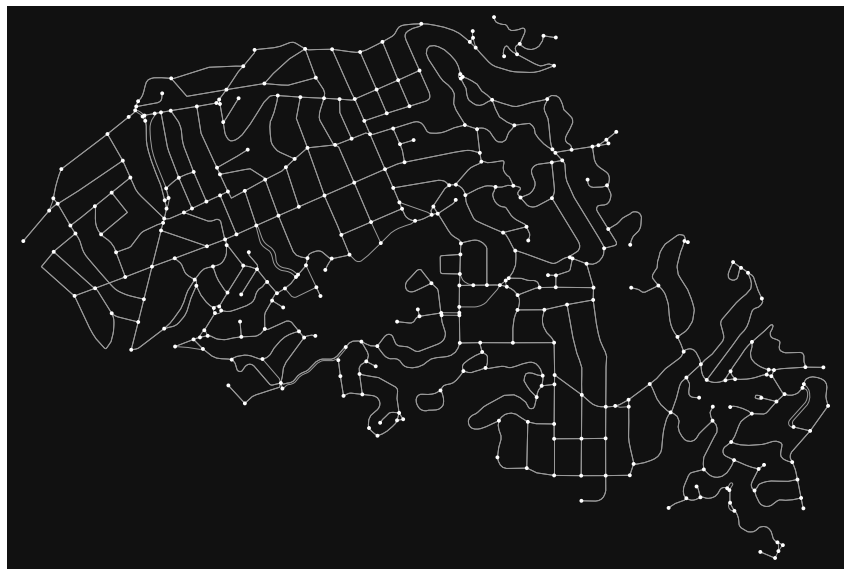

In [4]:
# download/model a street network for some city then visualize it
G = ox.graph_from_place("Piedmont, California, USA", network_type="drive")
fig, ax = ox.plot_graph(G,  figsize=(15, 20))

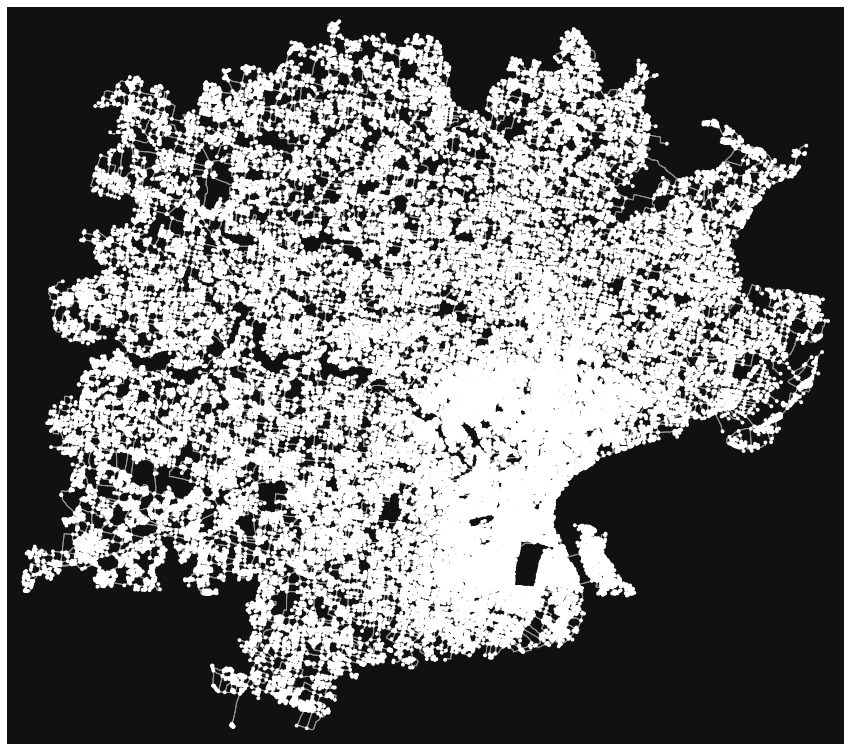

In [19]:
# download/model a street network for some city then visualize it
VNS = ox.graph_from_place("Varanasi, India", network_type="drive")
fig, ax = ox.plot_graph(VNS,  figsize=(15, 20))

In [6]:
import folium
from geopy.geocoders import Nominatim

In [7]:
# calling the Nominatim tool
loc = Nominatim(user_agent="GetLoc")
 
# entering the location name
getLoc = loc.geocode("Piedmont, California, USA")
 
# printing address
print(getLoc.address)
 
# printing latitude and longitude
print("Latitude = ", getLoc.latitude, "\n")
print("Longitude = ", getLoc.longitude)

# mapping the place using folium
m_1 = folium.Map(location=[getLoc.latitude,getLoc.longitude ], tiles='cartodbpositron', zoom_start=10)

# Display the map
m_1

Piedmont, Alameda County, California, 94611, United States
Latitude =  37.8243715 

Longitude =  -122.231635


OSMnx models all networks as NetworkX MultiDiGraph objects. You can convert to:

- undirected MultiGraphs
- DiGraphs without (possible) parallel edges
- GeoPandas node/edge GeoDataFrames

In [9]:
ox.geocoder.geocode("Piedmont, California, USA")

(37.8243715, -122.231635)

In [10]:
# convert your MultiDiGraph to an undirected MultiGraph
M = ox.utils_graph.get_undirected(G)

# convert your MultiDiGraph to a DiGraph without parallel edges
D = ox.utils_graph.get_digraph(G)

In [13]:
# you can convert your graph to node and edge GeoPandas GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_nodes.head()

,y,x,street_count,highway,geometry
osmid,,,,,
53017091,37.826250,-122.247604,3,NaN,POINT (-122.24760 37.82625)
53018397,37.824224,-122.247194,3,NaN,POINT (-122.24719 37.82422)
53018399,37.824918,-122.246080,3,NaN,POINT (-122.24608 37.82492)
53018402,37.825406,-122.245317,3,NaN,POINT (-122.24532 37.82541)
53018404,37.825948,-122.244467,3,NaN,POINT (-122.24447 37.82595)


In [15]:
gdf_edges.head(10)

osmid           name      highway  oneway   length  \
u        v        key                                                           
53017091 53064327 0      6345781    Rose Avenue  residential   False  231.335   
         53075599 0      6345781    Rose Avenue  residential   False  121.114   
53018397 53097980 0    196739937   Linda Avenue     tertiary   False  100.767   
         53018399 0      6327298    Lake Avenue  residential   False  124.622   
         53018411 0    196739937   Linda Avenue     tertiary   False   37.803   
53018399 53018402 0      6327298    Lake Avenue  residential   False   86.229   
         53018397 0      6327298    Lake Avenue  residential   False  124.622   
         53078914 0      6348245  Howard Avenue  residential   False  118.323   
53018402 53018404 0      6327298    Lake Avenue  residential   False   95.954   
         53018399 0      6327298    Lake Avenue  residential   False   86.229   

                                                                geometry  \
u        v        key                                                      
53017091 53064327 0    LINESTRING (-122.24760 37.82625, -122.24551 37...   
         53075599 0    LINESTRING (-122.24760 37.82625, -122.24770 37...   
53018397 53097980 0    LINESTRING (-122.24719 37.82422, -122.24777 37...   
         53018399 0    LINESTRING (-122.24719 37.82422, -122.24712 37...   
         53018411 0    LINESTRING (-122.24719 37.82422, -122.24713 37...   
53018399 53018402 0    LINESTRING (-122.24608 37.82492, -122.24532 37...   
         53018397 0    LINESTRING (-122.24608 37.82492, -122.24663 37...   
         53078914 0    LINESTRING (-122.24608 37.82492, -122.24605 37...   
53018402 53018404 0    LINESTRING (-122.24532 37.82541, -122.24447 37...   
         53018399 0    LINESTRING (-122.24532 37.82541, -122.24608 37...   

                      lanes maxspeed bridge junction  
u        v        key                                 
53017091 53064327 0     NaN      NaN    NaN      NaN  
         53075599 0     NaN      NaN    NaN      NaN  
53018397 53097980 0     NaN      NaN    NaN      NaN  
         53018399 0     NaN      NaN    NaN      NaN  
         53018411 0     NaN      NaN    NaN      NaN  
53018399 53018402 0     NaN      NaN    NaN      NaN  
         53018397 0     NaN      NaN    NaN      NaN  
         53078914 0     NaN      NaN    NaN      NaN  
53018402 53018404 0     NaN      NaN    NaN      NaN  
         53018399 0     NaN      NaN    NaN      NaN

So basically in the edges file we have is between two points

In [16]:
# convert node/edge GeoPandas GeoDataFrames to a NetworkX MultiDiGraph
G2 = ox.graph_from_gdfs(gdf_nodes, gdf_edges, graph_attrs=G.graph)

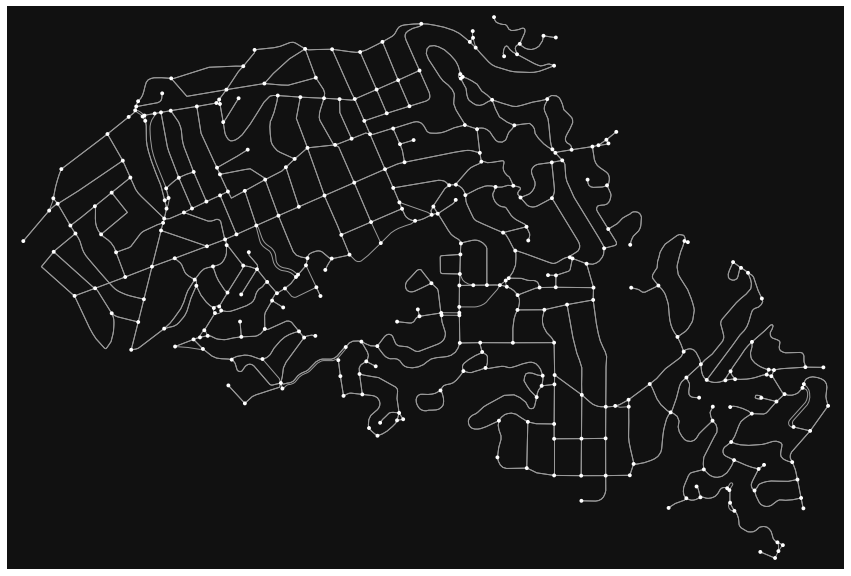

(<Figure size 1080x1440 with 1 Axes>, <AxesSubplot:>)

In [18]:
ox.plot_graph(G2,  figsize=(15, 20))

# Basic street network stats

In [20]:
# what sized area does our network cover in square meters?
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

4214764.353481118

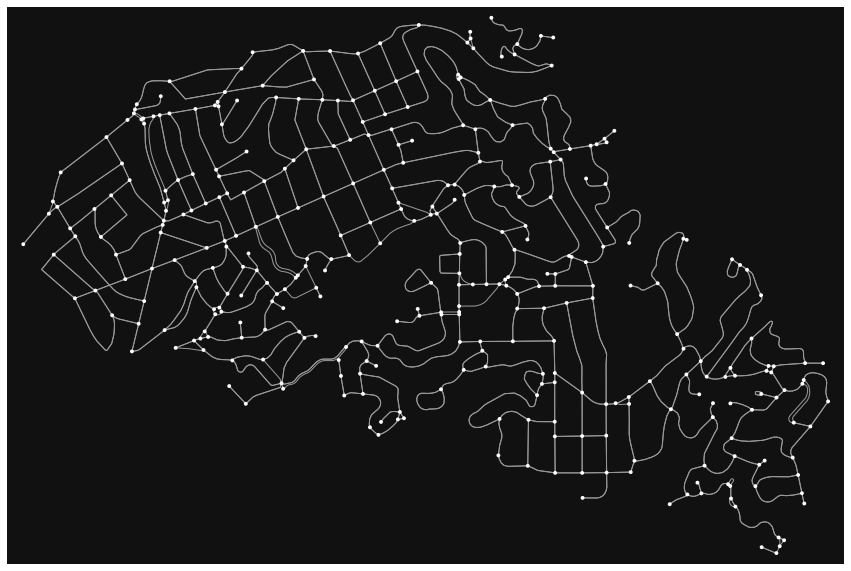

(<Figure size 1080x1440 with 1 Axes>, <AxesSubplot:>)

In [25]:
ox.plot_graph(G_proj,  figsize=(15, 20))

In [26]:
# show some basic stats about the network
ox.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)

{'n': 346,
 'm': 935,
 'k_avg': 5.404624277456647,
 'edge_length_total': 113090.51900000009,
 'edge_length_avg': 120.95242673796801,
 'streets_per_node_avg': 2.959537572254335,
 'streets_per_node_counts': {0: 0, 1: 34, 2: 0, 3: 262, 4: 47, 5: 2, 6: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.09826589595375723,
  2: 0.0,
  3: 0.7572254335260116,
  4: 0.13583815028901733,
  5: 0.005780346820809248,
  6: 0.002890173410404624},
 'intersection_count': 312,
 'street_length_total': 58479.81800000003,
 'street_segment_count': 489,
 'street_length_avg': 119.59062985685077,
 'circuity_avg': 1.1128907953828209,
 'self_loop_proportion': 0.006134969325153374,
 'clean_intersection_count': 266,
 'node_density_km': 82.09237124116483,
 'intersection_density_km': 74.02549083018332,
 'edge_density_km': 26831.990952612752,
 'street_density_km': 13874.991125351895,
 'clean_intersection_density_km': 63.11147615650244}

# Visualize street centrality

In [29]:
nx.line_graph(G)

In [30]:
# convert graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))
nx.set_edge_attributes(G, edge_centrality, "edge_centrality")

In [32]:
# you can convert your graph to node and edge GeoPandas GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_edges.head()

osmid          name      highway  oneway   length  \
u        v        key                                                          
53017091 53064327 0      6345781   Rose Avenue  residential   False  231.335   
         53075599 0      6345781   Rose Avenue  residential   False  121.114   
53018397 53097980 0    196739937  Linda Avenue     tertiary   False  100.767   
         53018399 0      6327298   Lake Avenue  residential   False  124.622   
         53018411 0    196739937  Linda Avenue     tertiary   False   37.803   

                       edge_centrality  \
u        v        key                    
53017091 53064327 0           0.053704   
         53075599 0           0.053704   
53018397 53097980 0           0.053495   
         53018399 0           0.053495   
         53018411 0           0.053495   

                                                                geometry  \
u        v        key                                                      
53017091 53064327 0    LINESTRING (-122.24760 37.82625, -122.24551 37...   
         53075599 0    LINESTRING (-122.24760 37.82625, -122.24770 37...   
53018397 53097980 0    LINESTRING (-122.24719 37.82422, -122.24777 37...   
         53018399 0    LINESTRING (-122.24719 37.82422, -122.24712 37...   
         53018411 0    LINESTRING (-122.24719 37.82422, -122.24713 37...   

                      lanes maxspeed bridge junction  
u        v        key                                 
53017091 53064327 0     NaN      NaN    NaN      NaN  
         53075599 0     NaN      NaN    NaN      NaN  
53018397 53097980 0     NaN      NaN    NaN      NaN  
         53018399 0     NaN      NaN    NaN      NaN  
         53018411 0     NaN      NaN    NaN      NaN

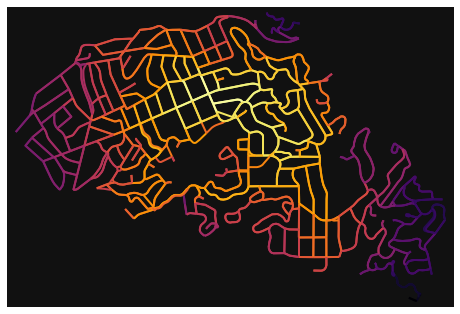

In [33]:
# color edges in original graph with closeness centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G, "edge_centrality", cmap="inferno")
fig, ax = ox.plot_graph(G, edge_color=ec, edge_linewidth=2, node_size=0)

# Routing

In [34]:
# impute missing edge speeds and calculate edge travel times with the speed module
G = ox.speed.add_edge_speeds(G)
G = ox.speed.add_edge_travel_times(G)

In [35]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_edges.head()

osmid          name      highway  oneway   length  \
u        v        key                                                          
53017091 53064327 0      6345781   Rose Avenue  residential   False  231.335   
         53075599 0      6345781   Rose Avenue  residential   False  121.114   
53018397 53097980 0    196739937  Linda Avenue     tertiary   False  100.767   
         53018399 0      6327298   Lake Avenue  residential   False  124.622   
         53018411 0    196739937  Linda Avenue     tertiary   False   37.803   

                       edge_centrality  speed_kph  travel_time  \
u        v        key                                            
53017091 53064327 0           0.053704       24.1         34.6   
         53075599 0           0.053704       24.1         18.1   
53018397 53097980 0           0.053495       40.2          9.0   
         53018399 0           0.053495       24.1         18.6   
         53018411 0           0.053495       40.2          3.4   

                                                                geometry  \
u        v        key                                                      
53017091 53064327 0    LINESTRING (-122.24760 37.82625, -122.24551 37...   
         53075599 0    LINESTRING (-122.24760 37.82625, -122.24770 37...   
53018397 53097980 0    LINESTRING (-122.24719 37.82422, -122.24777 37...   
         53018399 0    LINESTRING (-122.24719 37.82422, -122.24712 37...   
         53018411 0    LINESTRING (-122.24719 37.82422, -122.24713 37...   

                      lanes maxspeed bridge junction  
u        v        key                                 
53017091 53064327 0     NaN      NaN    NaN      NaN  
         53075599 0     NaN      NaN    NaN      NaN  
53018397 53097980 0     NaN      NaN    NaN      NaN  
         53018399 0     NaN      NaN    NaN      NaN  
         53018411 0     NaN      NaN    NaN      NaN

In [36]:
# get the nearest network nodes to two lat/lng points with the distance module
orig = ox.distance.nearest_nodes(G, X=-122.245846, Y=37.828903)
dest = ox.distance.nearest_nodes(G, X=-122.215006, Y=37.812303)

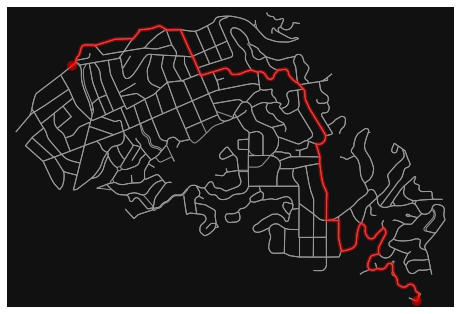

In [42]:
# find the shortest path between nodes, minimizing travel time, then plot it
route = ox.shortest_path(G, orig, dest, weight="distance")
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [43]:
# how long is our route in meters?
edge_lengths = ox.utils_graph.get_route_edge_attributes(G, route, "length")
round(sum(edge_lengths))

5249

In [44]:
# how far is it between these two nodes as the crow flies?
# use OSMnx's vectorized great-circle distance (haversine) function
orig_x = G.nodes[orig]["x"]
orig_y = G.nodes[orig]["y"]
dest_x = G.nodes[dest]["x"]
dest_y = G.nodes[dest]["y"]
round(ox.distance.great_circle_vec(orig_y, orig_x, dest_y, dest_x))

3124

In [45]:
# add elevation to nodes automatically, calculate edge grades, plot network
# you need a google elevation api key to run this cell!
try:
    from keys import google_elevation_api_key

    G = ox.elevation.add_node_elevations_google(G, api_key=google_elevation_api_key)
    G = ox.elevation.add_edge_grades(G)
    nc = ox.plot.get_node_colors_by_attr(G, "elevation", cmap="plasma")
    fig, ax = ox.plot_graph(G, node_color=nc, node_size=20, edge_linewidth=2, edge_color="#333")
except ImportError:
    print("You need a google_elevation_api_key to run this cell.")

You need a google_elevation_api_key to run this cell.


# Get the network other ways

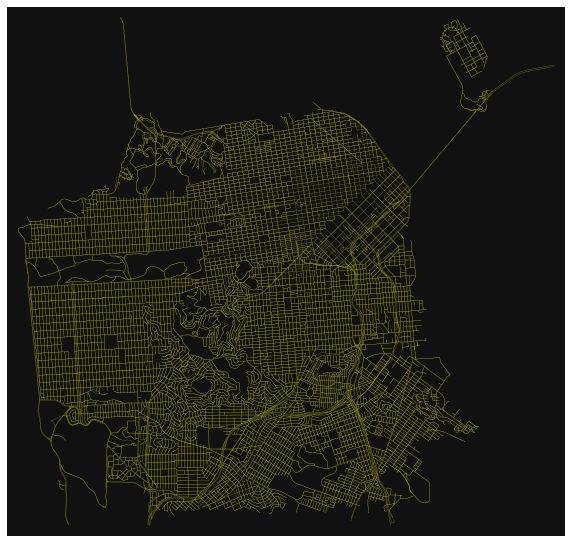

In [47]:
# you can make query an unambiguous dict to help the geocoder find it
place = {"city": "San Francisco", "state": "California", "country": "USA"}
G = ox.graph_from_place(place, network_type="drive", truncate_by_edge=True)
fig, ax = ox.plot_graph(G, figsize=(10, 10), node_size=0, edge_color="y", edge_linewidth=0.2)

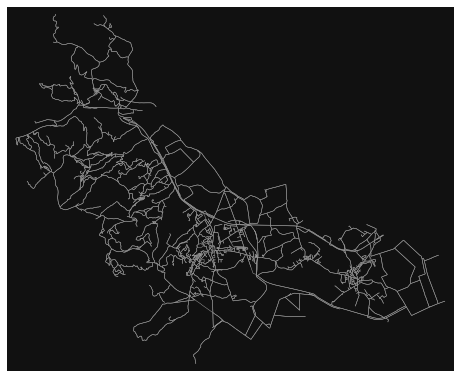

In [50]:
# you can get networks anywhere in the world
G = ox.graph_from_place("Sinalunga, Italy", network_type="all")
fig, ax = ox.plot_graph(G, node_size=0, edge_linewidth=0.5)

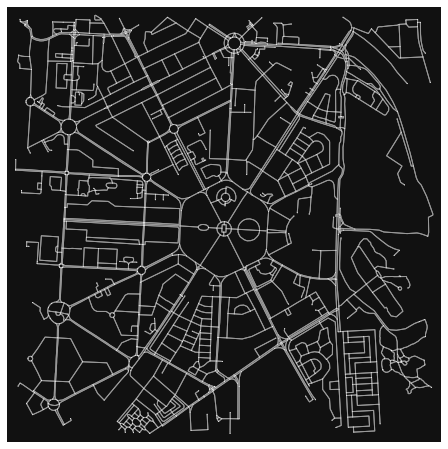

In [56]:
# or get network by address, coordinates, bounding box, or any custom polygon
# ...useful when OSM just doesn't already have a polygon for the place you want
india_gate = (28.613034566733436, 77.23110272413987)

one_mile = 1609  # meters
G = ox.graph_from_point(india_gate, dist=one_mile, network_type="walk")
fig, ax = ox.plot_graph(G, node_size=1)

# Get other networked infrastructure types

...like rail or electric grids or even the canals of Venice and Amsterdam, using the custom_filter parameter: see more examples.

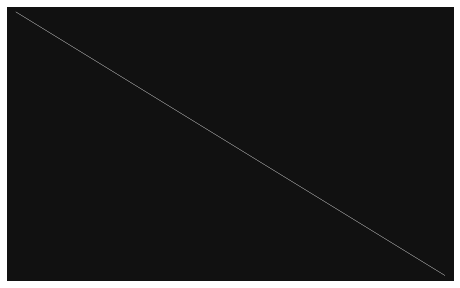

In [59]:
# get NY subway rail network
G = ox.graph_from_place(
    "New Delhi, Delhi, India",
    retain_all=False,
    truncate_by_edge=True,
    simplify=True,
    custom_filter='["subway"]',
)

fig, ax = ox.plot_graph(G, node_size=0, edge_color="w", edge_linewidth=0.2)